# Credit Risk Default Project

## Step 1 - Understand the Problem and Objective 
<b>Problem : </b>In general, whenever an individual/corporation applies for a loan from a bank (or any loan issuer), their credit history undergoes a rigourous check to ensure that whether they are capable enough to pay off the loan (in this industry it is referred to as credit-worthiness). Put yourself in the shoes of a loan issuer and manage credit risk by using the past data and deciding whom to give the loan to in the future. The text file contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.

<b>Objective : </b>Build a data model to predict the probability of default, and choose a cut-off based on what you feel is suitable. Alternatively you can also use a modelling technique which gives binary output. Based on the data that is available during loan application, build a model to predict default in the future. This will help the company in deciding whether or not to pass the loan. The data should be divided into train ( June 2007 - May 2015 ) and out-of-time test ( June 2015 - Dec 2015 ) data. You will have use the training data to build models/analytical solution and finally apply it to test data to measure the performance and robustness of the models.

In [85]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading all the required libraries
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Settings
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (16, 4)

pd.options.display.max_columns = 500

## Step 2 - Understand the Data
Let's look how many observations and features are present in complete dataset. Also, what is the data type of each feature. First few rows of dataset to get an idea how the data value looks.

In [86]:
# Loading Default Credit Risk dataset
data_org = pd.read_csv('C:/Users/ajana/Desktop/Imarticus Project/Python Project/XYZCorp_LendingData.txt', 
                   encoding = 'utf-8', sep = '\t', low_memory=False)

print('Dataset dimension: {} rows, {} columns'.format(data_org.shape[0], data_org.shape[1]))

Dataset dimension: 855969 rows, 73 columns


In [87]:
# Metadata of Default Credit Risk dataset
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806530 non-null object
emp_length                     855969 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

There are totoal 73 columns in the dataset out of which 72 are features and 1 is response i.e. default_ind
### Describe Dataset
- Generate basic statistics of numerical features
- Generate basic statistics of categorical features

In [88]:
# Basic statistics of numerical features
data_org.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

Following observations can be made from above 2 tables:
- There are many null values in following numerical features: mths_since_last_delinq, mths_since_last_record, mths_since_last_major_derog, annual_inc_joint, dti_joint, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m
- id and member_id features are unique identifier. Unique identifier is used to identify unique customer, however, it doesn't have any impact or correlation with response varialbe default_ind. Hence, we can remove this feature from the dataset before training the mode.
- policy_code feature has only one value i.e. 1.0. So, we can eliminate this feature as it will have no impact on training the model since, there is no variation in this feature.

So, we need to handle null values and remove id, member_id & policy_code from dataset

In [89]:
# Basic statistics of categorical features
data_org.describe(include=[np.object])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,855969,855969,855969,806530,855969,855969,855969,855969,855969,121813,855969,855937,855969,855969,855969,855969,847107,602998,855919,855969,442
unique,2,7,35,290913,12,6,3,103,2,120336,14,60992,931,51,697,2,97,3,102,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,n,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,48212,855964,231,505392,398089,9466,125172,6433,442555,467510,534094,701687,855527,252


Following observations can be from above table:
- There are null values in following categorical features: desc, title, last_pymnt_d, next_pymnt_d, last_credit_pull_d, verification_status_joint
- pymnt_plan feature has only 2 values and value 'n' has 855964 occurences out of 855969 observations, which means, other value has only 5 occurences i.e. 99.99% times feature value is not changing, hence, there is hardly has any variation. So, we can remove this feature from dataset.
- zip_code & addr_state feature provides information about location of customer. But, we have only first 3 numbers of zip code and remaining are unknown. So, ideally this feature will also not have any impact on training the model, so, we can remove this feature from the dataset
- application_type feature has only 2 values and value 'INDIVIDUAL' has 855527 occurences out of 855969 observations, which means, other value has only 442 occurences i.e. 99.95% times feature value is not changing, hence, there is hardly any variation. So, we can remove this feature from dataset.

So, we need to handle null values and remove pymnt_plan, zip_code & application_type from dataset

In [90]:
# Let's look into the first 5 rows of dataset
data_org.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Step 3 - Exploratory Data Analysis

### Step 3.1 - Identify Features with NULL values
To understand how each features are impacting the default loan indicator, we need to first handle the null / missing values, otherwise our observations might not be accurate and will lead to wrong conclusions.

In [91]:
null_feat_data = pd.DataFrame()
null_feat_data['Null Count'] = data_org.isnull().sum().sort_values(ascending=False)
null_feat_data['Null Pct'] = null_feat_data['Null Count'] / float(len(data_org))

print('Features with more than 75% null values of overall dataset:')
print(null_feat_data[null_feat_data['Null Pct'] >= 0.75])

print('\nFeatures with more than 50% & less than 75% null values of overall dataset:')
print(null_feat_data[(null_feat_data['Null Pct'] >= 0.50) & (null_feat_data['Null Pct'] < 0.75)])

print('\nFeatures with less than 50% null values of overall dataset:')
print(null_feat_data[(null_feat_data['Null Pct'] > 0) & (null_feat_data['Null Pct'] < 0.50)])

Features with more than 75% null values of overall dataset:
                             Null Count  Null Pct
dti_joint                        855529  0.999486
annual_inc_joint                 855527  0.999484
verification_status_joint        855527  0.999484
il_util                          844360  0.986438
mths_since_rcnt_il               843035  0.984890
inq_last_12m                     842681  0.984476
total_bal_il                     842681  0.984476
open_acc_6m                      842681  0.984476
open_il_12m                      842681  0.984476
open_il_24m                      842681  0.984476
open_il_6m                       842681  0.984476
open_rv_12m                      842681  0.984476
total_cu_tl                      842681  0.984476
max_bal_bc                       842681  0.984476
all_util                         842681  0.984476
open_rv_24m                      842681  0.984476
inq_fi                           842681  0.984476
desc                             734156 

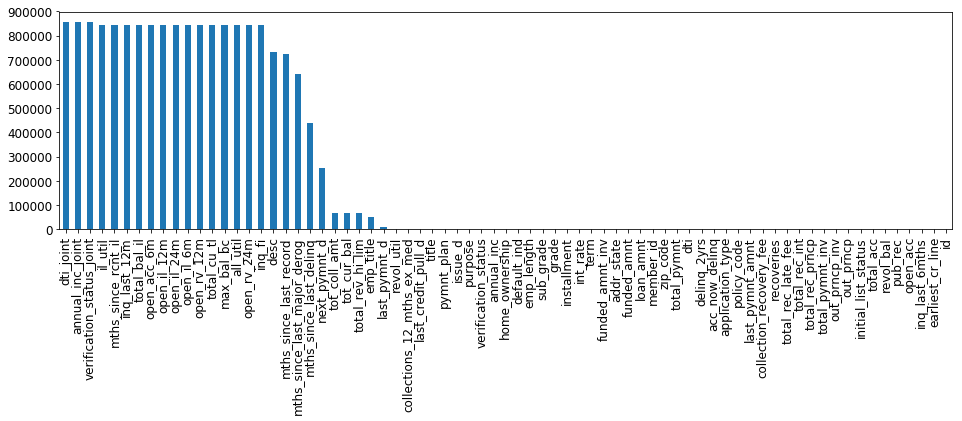

In [92]:
# Visualize null value counts against each feature
null_feat_data['Null Count'].plot.bar();

### Step 3.2 - Handle Missing / Null Values
We need to handle missing or null values based on the volume of missing data per features. We can handle this by 2 ways:
- Approach 1 - We can drop the features who has considerable null values i.e. more than 29% of overall dataset and remove the observations where there are remaining null values which should contribute around 8% of overall dataset. So, in this case we are not handling the null values but removing them based on the amount of null values in each feature
- Approach 2 - For features with more than 50% null values, we can drop those features as most of the information is missing and it doesn't make sense to populate those features with any values. For features with less than 50% null values, we need to hanlde them with mean, median or mode value based on the type of features
    - Numerical features to be populated by mean value of feature
    - Categorical feature to be populated by mode value of feature

We will create dataset with both approaches and will later decide which dataset to use for training the model

In [93]:
# Approach 1
# Copy original dataset
data_proc_1 = data_org.copy()

# Remove all features where more than 29% of values are null
data_proc_1.drop(null_feat_data[null_feat_data['Null Pct'] >= 0.29].index, axis = 1, inplace = True) 


data_proc_1.dropna(axis = 0, inplace = True)

# 22 features and few observations should be less than original dataset
print('Dataset dimension after null values treatment through Approach 1: {} rows, {} columns'.format(data_proc_1.shape[0], data_proc_1.shape[1]))

Dataset dimension after null values treatment through Approach 1: 734795 rows, 51 columns


In [94]:
# Approach 2
# Copy original dataset
data_proc_2 = data_org.copy()

# Remove all features where more than 75% of values are null
data_proc_2.drop(null_feat_data[null_feat_data['Null Pct'] >= 0.50].index, axis = 1, inplace = True) 

# 21 features should be less than original dataset
print('Dataset dimension after null values treatment through Approach 1: {} rows, {} columns'.format(data_proc_2.shape[0], data_proc_2.shape[1]))

Dataset dimension after null values treatment through Approach 1: 855969 rows, 52 columns


In [95]:
data_proc_2[null_feat_data[(null_feat_data['Null Pct'] > 0) & (null_feat_data['Null Pct'] < 0.50)].index].describe(include='all')

,next_pymnt_d,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_title,last_pymnt_d,revol_util,collections_12_mths_ex_med,last_credit_pull_d,title
count,602998,7.886560e+05,7.886560e+05,7.886560e+05,806530,847107,855523.000000,855913.000000,855919,855937
unique,3,NaN,NaN,NaN,290913,97,NaN,NaN,102,60992
top,Feb-2016,NaN,NaN,NaN,Teacher,Jan-2016,NaN,NaN,Jan-2016,Debt consolidation
freq,534094,NaN,NaN,NaN,12965,467510,NaN,NaN,701687,398089
mean,NaN,2.254129e+02,1.397662e+05,3.216357e+04,NaN,NaN,55.019405,0.014230,NaN,NaN
std,NaN,1.048945e+04,1.539385e+05,3.769964e+04,NaN,NaN,23.811585,0.133712,NaN,NaN
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000e+00,2.987000e+04,1.400000e+04,NaN,NaN,37.600000,0.000000,NaN,NaN
50%,NaN,0.000000e+00,8.100850e+04,2.380000e+04,NaN,NaN,55.900000,0.000000,NaN,NaN
75%,NaN,0.000000e+00,2.087032e+05,3.990000e+04,NaN,NaN,73.500000,0.000000,NaN,NaN


In [96]:
# Get the maximum frequency of categorical feature and save it for treating null values
next_pymnt_d_mode = data_proc_2['next_pymnt_d'].value_counts().index[0]
last_pymnt_d_mode = data_proc_2['last_pymnt_d'].value_counts().index[0]
last_credit_pull_d_mode = data_proc_2['last_credit_pull_d'].value_counts().index[0]

# Get the mean value of numeric feature and save it for treating null values
tot_coll_amt_mean = data_proc_2['tot_coll_amt'].mean()
tot_cur_bal_mean = data_proc_2['tot_cur_bal'].mean()
total_rev_hi_lim_mean = data_proc_2['total_rev_hi_lim'].mean()
revol_util_mean = data_proc_2['revol_util'].mean()
collections_12_mths_ex_med_mean = data_proc_2['collections_12_mths_ex_med'].mean()

# Employee Title and Title features have too many unique categories and might not be a good feature for transformation
# and training the model

# Create dictionary of column name and values for treating null values in dataset
fill_values = {'next_pymnt_d':next_pymnt_d_mode, 'last_pymnt_d':last_pymnt_d_mode, 'last_credit_pull_d':last_credit_pull_d_mode,
              'tot_coll_amt':tot_coll_amt_mean, 'tot_cur_bal':tot_cur_bal_mean, 'revol_util':revol_util_mean,
              'total_rev_hi_lim':total_rev_hi_lim_mean, 'collections_12_mths_ex_med':collections_12_mths_ex_med_mean}

# Fill null values with mean and mode values accordingly
data_proc_2 = data_proc_2.fillna(value = fill_values, inplace = True)

data_proc_2.columns[data_proc_2.isnull().any()].tolist()

['emp_title', 'title']

As you can see above only emp_title and title features have null values which we have left intentionally. emp_title represents the job title of the borrower and title represents the loan title. Information contained in these features shouldn't impact the outcome of credit risk default. So, let's remove these features along with the features discussed above in understanding the data section.

In [97]:
# Features to remove
feat_to_remove = ['id', 'member_id', 'policy_code', 'pymnt_plan', 'zip_code', 
                  'addr_state', 'application_type', 'emp_title', 'title']

data_proc_1.drop( feat_to_remove , axis = 1, inplace = True )
print('Approach 1 cleaned Dataset dimension: {} rows, {} columns'.format(data_proc_1.shape[0], data_proc_1.shape[1]))

data_proc_2.drop( feat_to_remove , axis = 1, inplace = True )
print('Approach 2 cleaned Dataset dimension: {} rows, {} columns'.format(data_proc_2.shape[0], data_proc_2.shape[1]))

Approach 1 cleaned Dataset dimension: 734795 rows, 42 columns
Approach 2 cleaned Dataset dimension: 855969 rows, 43 columns


Through Approach 1 where we are removing all the observations where there is atleast 1 null value, the resulting cleaned dataset is around 14% less the original dataset. The cleaned dataset through approach 1 still has lots of observations, so we will be using cleaned dataset through approach 1. Also, approach 2 where mode & median values has been used to impute null values means 14% of our dataset can be baised towards those values.

### Step 3.3 - Exploratory Data Analysis - Categorical Features
Let's visualize & understand how different features are behaving against loan default indicator

In [98]:
loan_data = data_proc_1.copy() # Copy cleaned dataset for EDA & feature changes

# Let's add 2 features for EDA: Loan provided and Loan not provided
loan_data['Default_Yes'] = loan_data['default_ind'] # 1 means Loan Defaulter
loan_data['Default_No'] = 1 - loan_data['default_ind'] # 0 means not a Loan Defaulter

# Let's look into the new dataset and identify features for which plots needs to be build for categorical features
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Default_Yes,Default_No
39694,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,10+ years,OWN,55000.0,Verified,Dec-2013,debt_consolidation,22.87,0.0,Oct-1986,0.0,14.0,0.0,36638.0,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-2016,885.46,Dec-2015,0.0,0.0,0.0,114834.0,59900.0,0,0,1
39695,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,1 year,RENT,26000.0,Not Verified,Dec-2013,debt_consolidation,25.12,0.0,Jan-2007,0.0,12.0,0.0,7967.0,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-2016,333.14,Jan-2016,0.0,0.0,0.0,14123.0,15100.0,0,0,1
39696,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE,105000.0,Not Verified,Dec-2013,debt_consolidation,14.05,0.0,Mar-1994,1.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-2016,368.45,Jan-2016,0.0,0.0,0.0,267646.0,61100.0,0,0,1
39697,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,10+ years,RENT,40000.0,Source Verified,Dec-2013,debt_consolidation,16.94,0.0,Oct-1998,0.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-2015,119.17,Jan-2016,0.0,0.0,15386.0,13605.0,8100.0,0,0,1
39698,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,2 years,MORTGAGE,63000.0,Not Verified,Dec-2013,debt_consolidation,16.51,0.0,Mar-1998,0.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-2016,476.30,Jan-2016,0.0,0.0,1514.0,272492.0,15400.0,0,0,1


       Default_Yes  Default_No  Percentage Default
grade                                             
A             1405      119484            0.011622
B             6357      204760            0.030111
C             9691      197809            0.046704
D             8085      106775            0.070390
E             4857       53034            0.083899
F             2305       16088            0.125319
G              607        3538            0.146441


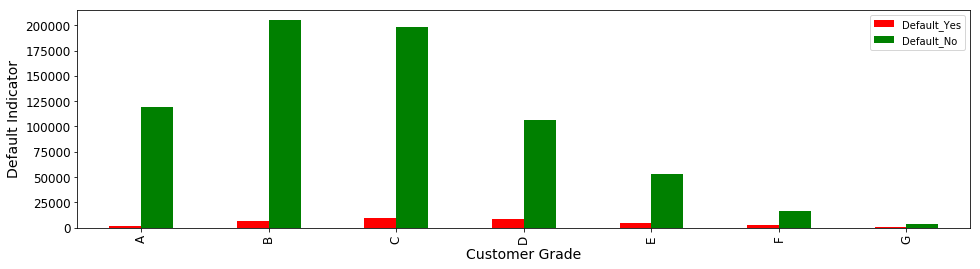

In [99]:
# Plotting of default indicator against Customer Grade feature
temp_grp = loan_data.groupby('grade').agg('sum')[['Default_Yes', 'Default_No']]
temp_grp['Percentage Default'] =  temp_grp['Default_Yes'] / (temp_grp['Default_Yes'] + temp_grp['Default_No'])
print(temp_grp)
loan_data.groupby('grade').agg('sum')[['Default_Yes', 'Default_No']].plot(kind='bar', stacked=False, colors=['red', 'green'])
plt.xlabel('Customer Grade')
plt.ylabel('Default Indicator');
# We can see default rate increases as the grade is increasing alphabetically

           Default_Yes  Default_No  Percentage Default
sub_grade                                             
A1                 100       18861            0.005274
A2                 130       18181            0.007100
A3                 184       18757            0.009714
A4                 402       26898            0.014725
A5                 589       36787            0.015759
B1                 802       37318            0.021039
B2                1084       39817            0.026503
B3                1466       44501            0.031892
B4                1628       44753            0.035101
B5                1377       38371            0.034643
C1                1701       42494            0.038489
C2                1819       41766            0.041735
C3                2055       40854            0.047892
C4                2064       39758            0.049352
C5                2052       32937            0.058647
D1                1913       28641            0.062610
D2        

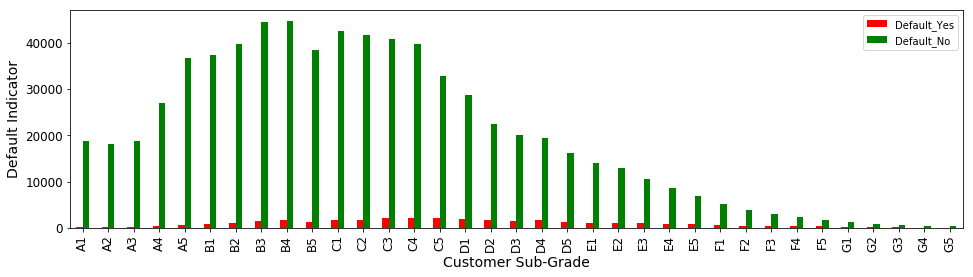

In [100]:
# Plotting of default indicator against Customer Sub-Grade feature
temp_grp = loan_data.groupby('sub_grade').agg('sum')[['Default_Yes', 'Default_No']]
temp_grp['Percentage Default'] =  temp_grp['Default_Yes'] / (temp_grp['Default_Yes'] + temp_grp['Default_No'])
print(temp_grp)
loan_data.groupby('sub_grade').agg('sum')[['Default_Yes', 'Default_No']].plot(kind='bar', stacked=False, colors=['red', 'green'])
plt.xlabel('Customer Sub-Grade')
plt.ylabel('Default Indicator');
# Sub-Grade is next detailed level of Customer Grade
# We can observe that sub-grade levels of grade A, E, F & G has low obsservations in comparison to grade B, C & D
# This will affect the training of prediction model considering data will be split into train & test dataset
# Hence, we will use Grade feature instead of Sub-Grade feature.

            Default_Yes  Default_No  Percentage Default
emp_length                                             
1 year             2287       46702            0.046684
10+ years         10613      250069            0.040712
2 years            3109       64912            0.045706
3 years            2682       57501            0.044564
4 years            1968       42234            0.044523
5 years            2360       44783            0.050060
6 years            2085       34534            0.056938
7 years            2073       37182            0.052809
8 years            1772       37302            0.045350
9 years            1479       29230            0.048162
< 1 year           2869       56751            0.048121
n/a                  10         288            0.033557


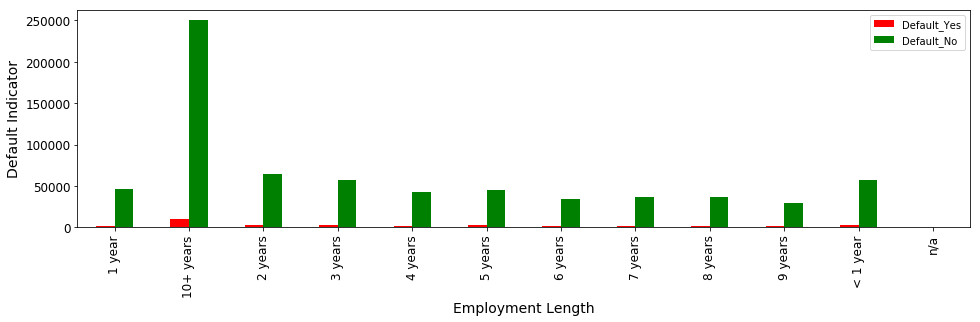

In [101]:
# Plotting of default indicator against employment length
temp_grp = loan_data.groupby('emp_length').agg('sum')[['Default_Yes', 'Default_No']]
temp_grp['Percentage Default'] =  temp_grp['Default_Yes'] / (temp_grp['Default_Yes'] + temp_grp['Default_No'])
print(temp_grp)
loan_data.groupby('emp_length').agg('sum')[['Default_Yes', 'Default_No']].plot(kind='bar', stacked=False, colors=['red', 'green'])
plt.xlabel('Employment Length')
plt.ylabel('Default Indicator');
# Default rate is consistent around 4-5% for any employment length
# We need to treat the values before building the model, transform categorical values into dummy numerical variables
# We will handle this later in Feature Transformation section

                Default_Yes  Default_No  Percentage Default
home_ownership                                             
ANY                       0           2            0.000000
MORTGAGE              14940      358671            0.039988
NONE                      6          35            0.146341
OTHER                     8          33            0.195122
OWN                    2841       66855            0.040763
RENT                  15512      275892            0.053232


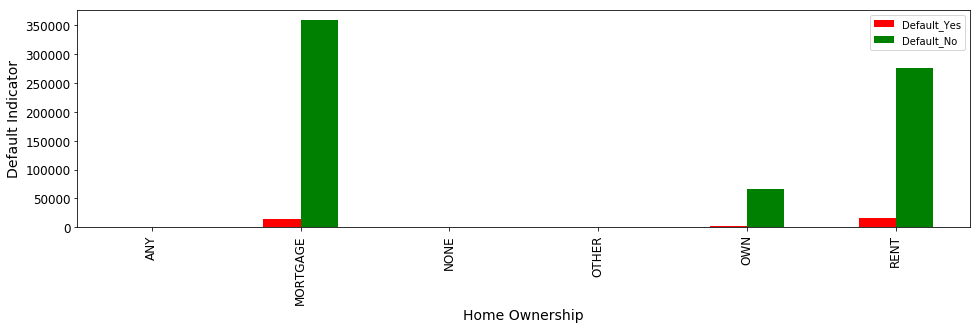

In [102]:
# Plotting of default indicator against home ownership status
temp_grp = loan_data.groupby('home_ownership').agg('sum')[['Default_Yes', 'Default_No']]
temp_grp['Percentage Default'] =  temp_grp['Default_Yes'] / (temp_grp['Default_Yes'] + temp_grp['Default_No'])
print(temp_grp)
loan_data.groupby('home_ownership').agg('sum')[['Default_Yes', 'Default_No']].plot(kind='bar', stacked=False, colors=['red', 'green'])
plt.xlabel('Home Ownership')
plt.ylabel('Default Indicator');
# ANY, NONE & OTHER categories have very few observations.
# Either we can remove those observations or select the features through Feature Selection Model

                     Default_Yes  Default_No  Percentage Default
verification_status                                             
Not Verified                8789      215058            0.039263
Source Verified            10804      277019            0.037537
Verified                   13714      209411            0.061463


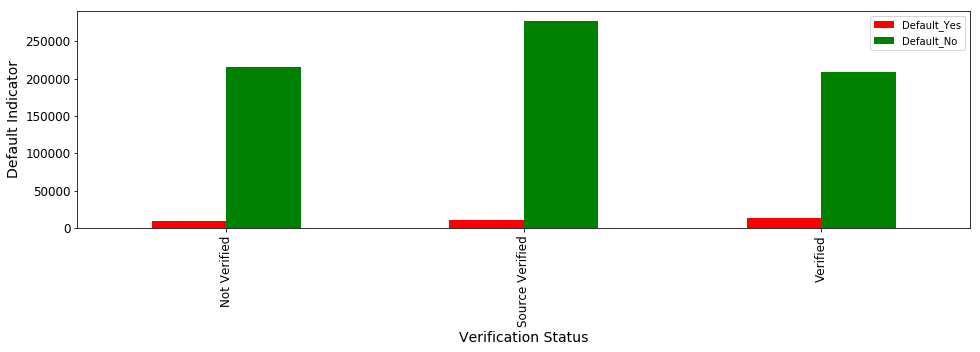

In [103]:
# Plotting of default indicator against verification status
temp_grp = loan_data.groupby('verification_status').agg('sum')[['Default_Yes', 'Default_No']]
temp_grp['Percentage Default'] =  temp_grp['Default_Yes'] / (temp_grp['Default_Yes'] + temp_grp['Default_No'])
print(temp_grp)
loan_data.groupby('verification_status').agg('sum')[['Default_Yes', 'Default_No']].plot(kind='bar', stacked=False, colors=['red', 'green'])
plt.xlabel('Verification Status')
plt.ylabel('Default Indicator');
# We can notice that Verified status has higher default rate

                     Default_Yes  Default_No  Percentage Default
initial_list_status                                             
f                          21541      328759            0.061493
w                          11766      372729            0.030601


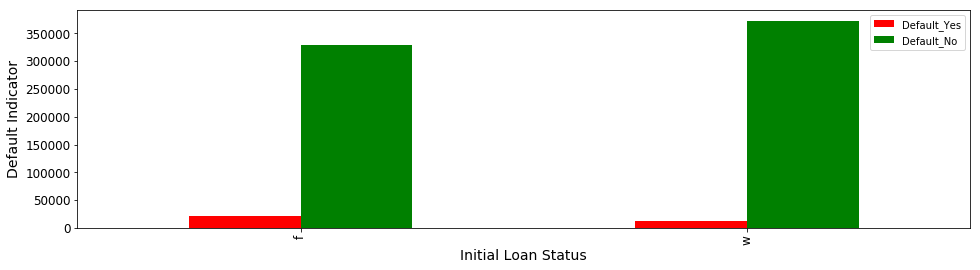

In [104]:
# Plotting of default indicator against initial loan status
temp_grp = loan_data.groupby('initial_list_status').agg('sum')[['Default_Yes', 'Default_No']]
temp_grp['Percentage Default'] =  temp_grp['Default_Yes'] / (temp_grp['Default_Yes'] + temp_grp['Default_No'])
print(temp_grp)
loan_data.groupby('initial_list_status').agg('sum')[['Default_Yes', 'Default_No']].plot(kind='bar', stacked=False, colors=['red', 'green'])
plt.xlabel('Initial Loan Status')
plt.ylabel('Default Indicator');
# We can notice that when initial loan status is 'f' then default rate is higher

            Default_Yes  Default_No  Percentage Default
term                                                   
 36 months        20964      485251            0.041413
 60 months        12343      216237            0.053999


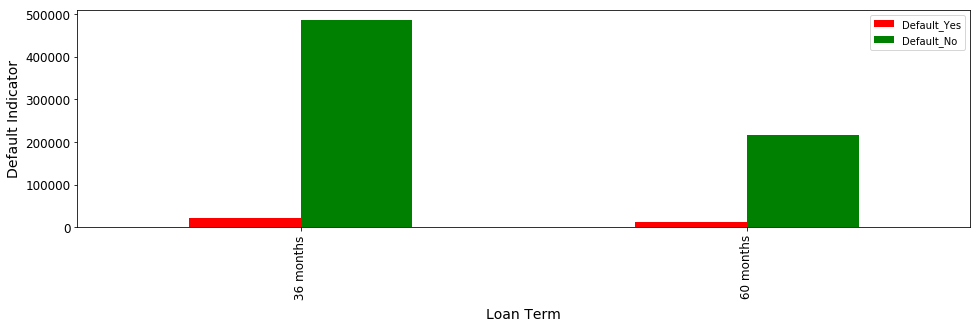

In [105]:
# Plotting of default indicator against loan term
temp_grp = loan_data.groupby('term').agg('sum')[['Default_Yes', 'Default_No']]
temp_grp['Percentage Default'] =  temp_grp['Default_Yes'] / (temp_grp['Default_Yes'] + temp_grp['Default_No'])
print(temp_grp)
loan_data.groupby('term').agg('sum')[['Default_Yes', 'Default_No']].plot(kind='bar', stacked=False, colors=['red', 'green'])
plt.xlabel('Loan Term')
plt.ylabel('Default Indicator');
# Default rate of 60 months is higher than 36 months loan term
# We need to treat the values before building the model, transform 36 months & 60 months into dummy numerical variables
# We will handle this later in Feature Transformation section

                    Default_Yes  Default_No  Percentage Default
purpose                                                        
car                         206        5807            0.034259
credit_card                6208      170105            0.035210
debt_consolidation        21308      420787            0.048198
educational                   0           1            0.000000
home_improvement           1562       39847            0.037721
house                       169        2506            0.063178
major_purchase              511       12050            0.040681
medical                     371        6114            0.057209
moving                      267        3746            0.066534
other                      1833       30281            0.057078
renewable_energy             21         359            0.055263
small_business              578        5697            0.092112
vacation                    167        3458            0.046069
wedding                     106         

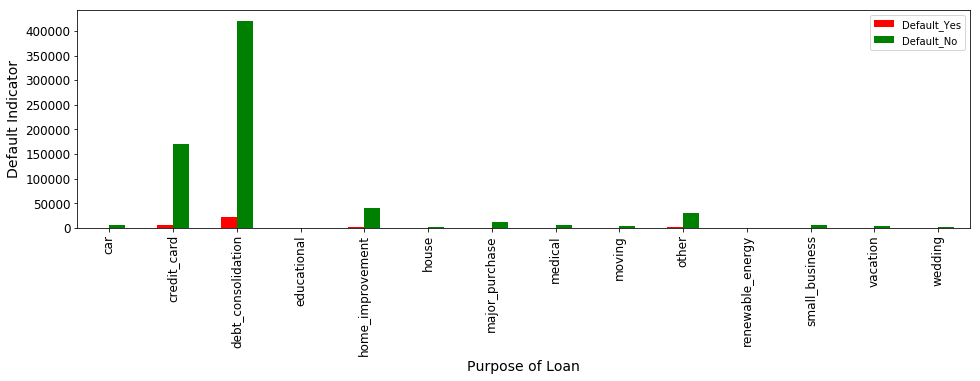

In [106]:
# Plotting of default indicator against purpose of loan
temp_grp = loan_data.groupby('purpose').agg('sum')[['Default_Yes', 'Default_No']]
temp_grp['Percentage Default'] =  temp_grp['Default_Yes'] / (temp_grp['Default_Yes'] + temp_grp['Default_No'])
print(temp_grp)
loan_data.groupby('purpose').agg('sum')[['Default_Yes', 'Default_No']].plot(kind='bar', stacked=False, colors=['red', 'green'])
plt.xlabel('Purpose of Loan')
plt.ylabel('Default Indicator');
# We can observe that Default rate higher for small business and wedding purposes
# We can ignore educational purpose as there is only 1 observation
# We need to treat the values before building the model, transform all categorical values into dummy numerical variables
# We will handle this later in Feature Transformation section

From above Categorical Features EDA following observations are noted:
- Default rate increases as the grade is increasing alphabetically
- Sub-Grade feature to be removed due to low observations in some sub-grade categories, instead, Grade feature will be used
- Default rate is consistent around 4-5% for any employment length
- Default rate of ANY, NONE & OTHER categories of home ownership status have very few observations. Either we can remove those observations or select the features through Feature Selection Model.
- Verification Status - 'Verified' status has higher default rate
- Initial loan status is 'f' then default rate is higher
- Default rate of 60 months is higher than 36 months loan term
- Default rate higher for small business and wedding purposes. We can ignore educational purpose as there is only 1 observation
- Finally, we need to transform all categorical values into dummy numerical variables for training the model
### Step 3.4 - Exploratory Data Analysis - Numerical Features

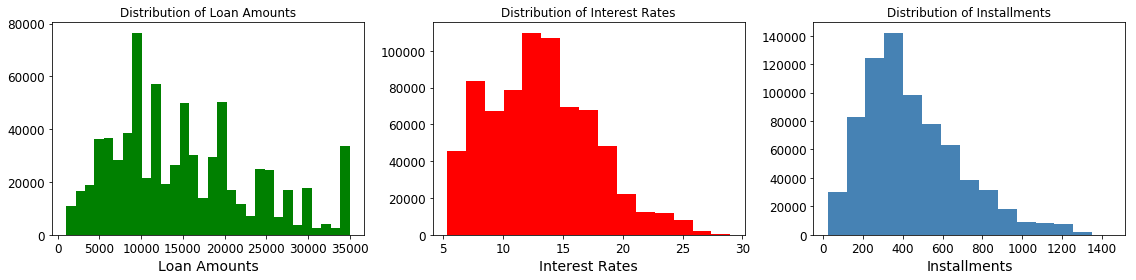

In [107]:
fig = plt.figure(figsize=(16,4))

# Histogram Plot for Loan Amount
plt.subplot(1,3,1)
plt.hist(loan_data['loan_amnt'], bins=30, color='green')
plt.title('Distribution of Loan Amounts')
plt.xlabel("Loan Amounts")

# Histogram Plot for Interest Rate
plt.subplot(1,3,2)
plt.hist(loan_data['int_rate'], bins=15, color='red')
plt.title('Distribution of Interest Rates')
plt.xlabel("Interest Rates")

# Histogram Plot for Interest Rate
plt.subplot(1,3,3)
plt.hist(loan_data['installment'], bins=15, color='steelblue')
plt.title('Distribution of Installments')
plt.xlabel("Installments")

fig.tight_layout();

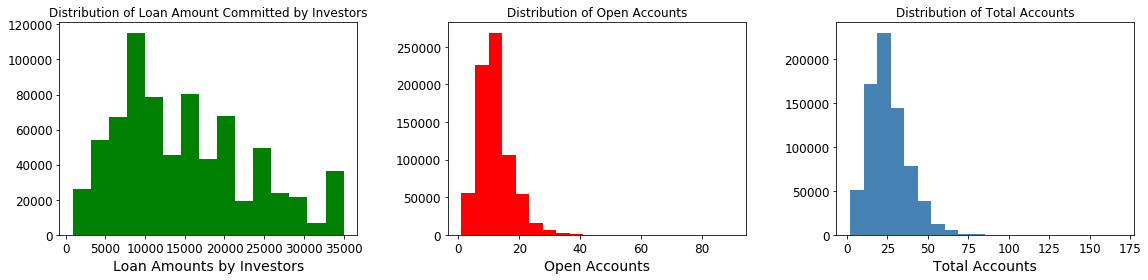

In [108]:
fig = plt.figure(figsize=(16,4))

# Histogram Plot for Loan Amount Committed by Investors
plt.subplot(1,3,1)
plt.hist(loan_data['funded_amnt_inv'], bins=15, color='green')
plt.title('Distribution of Loan Amount Committed by Investors')
plt.xlabel("Loan Amounts by Investors")

# Histogram Plot for Annual Income
plt.subplot(1,3,2)
plt.hist(loan_data['open_acc'], bins=20, color='red')
plt.title('Distribution of Open Accounts')
plt.xlabel("Open Accounts")

# Histogram Plot for Total Current Balance
plt.subplot(1,3,3)
plt.hist(loan_data['total_acc'], bins=20, color='steelblue')
plt.title('Distribution of Total Accounts')
plt.xlabel("Total Accounts")

fig.tight_layout();

## Step 4 - Feature Engineering and Selection
### Step 4.1 - Identify New Features

In [109]:
loan_data_proc = loan_data.copy()

# strip months from 'term' and make it an int
loan_data_proc['term'] = loan_data_proc['term'].str.split(' ').str[1]

# extract numbers from emp_length and fill missing values with the median
loan_data_proc['emp_length'] = loan_data_proc['emp_length'].str.extract('(\d+)').astype(float)
loan_data_proc['emp_length'] = loan_data_proc['emp_length'].fillna(loan_data_proc.emp_length.median())

# Loan Amount Difference
loan_data_proc['loan_amt_difference'] = 'equal'
loan_data_proc.loc[ ( loan_data_proc['funded_amnt'] - loan_data_proc['funded_amnt_inv']) > 0, 'loan_amt_difference' ] = 'less'

# Make categorical
loan_data_proc[ 'delinq_2yrs_cat' ] = 'no'
loan_data_proc.loc[ loan_data_proc[ 'delinq_2yrs' ] > 0, 'delinq_2yrs_cat' ] = 'yes'

loan_data_proc[ 'inq_last_6mths_cat' ] = 'no'
loan_data_proc.loc[ loan_data_proc['inq_last_6mths' ] > 0, 'inq_last_6mths_cat' ] = 'yes'

loan_data_proc[ 'pub_rec_cat' ] = 'no'
loan_data_proc.loc[ loan_data_proc['pub_rec'] > 0,'pub_rec_cat' ] = 'yes'

# Create new metric
loan_data_proc['acc_ratio'] = loan_data_proc.open_acc / loan_data_proc.total_acc

loan_data_proc.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Default_Yes,Default_No,loan_amt_difference,delinq_2yrs_cat,inq_last_6mths_cat,pub_rec_cat,acc_ratio
39694,27050.0,27050.0,27050.0,36,10.99,885.46,B,B2,10.0,OWN,55000.0,Verified,Dec-2013,debt_consolidation,22.87,0.0,Oct-1986,0.0,14.0,0.0,36638.0,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-2016,885.46,Dec-2015,0.0,0.0,0.0,114834.0,59900.0,0,0,1,equal,no,no,no,0.518519
39695,9750.0,9750.0,9750.0,36,13.98,333.14,C,C1,1.0,RENT,26000.0,Not Verified,Dec-2013,debt_consolidation,25.12,0.0,Jan-2007,0.0,12.0,0.0,7967.0,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-2016,333.14,Jan-2016,0.0,0.0,0.0,14123.0,15100.0,0,0,1,equal,no,no,no,0.428571
39696,12000.0,12000.0,12000.0,36,6.62,368.45,A,A2,10.0,MORTGAGE,105000.0,Not Verified,Dec-2013,debt_consolidation,14.05,0.0,Mar-1994,1.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-2016,368.45,Jan-2016,0.0,0.0,0.0,267646.0,61100.0,0,0,1,equal,no,yes,no,0.545455
39697,12000.0,12000.0,12000.0,36,13.53,407.40,B,B5,10.0,RENT,40000.0,Source Verified,Dec-2013,debt_consolidation,16.94,0.0,Oct-1998,0.0,7.0,2.0,5572.0,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-2015,119.17,Jan-2016,0.0,0.0,15386.0,13605.0,8100.0,0,0,1,equal,no,no,yes,0.218750
39698,15000.0,15000.0,15000.0,36,8.90,476.30,A,A5,2.0,MORTGAGE,63000.0,Not Verified,Dec-2013,debt_consolidation,16.51,0.0,Mar-1998,0.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-2016,476.30,Jan-2016,0.0,0.0,1514.0,272492.0,15400.0,0,0,1,equal,no,no,no,0.275862


### Step 4.2 - Remove Unnecessary Observations
- Above we have identified during EDA that there are some categorical features whose some categories have very less observations which results into very minimal variations. Hence, those observations can be removed. 
- We need to remove date features except issue_d which will be used to split the dataset into train and test set.
- Remove Default_Yes & Default_No features which were used for EDA

In [110]:
# Remove observations for categories having very low instances which doesn't have much variation and will not be useful for our model training
print('Dataset dimension before dropping categories with low observations: {} rows, {} columns'.format(loan_data_proc.shape[0], loan_data_proc.shape[1]))
loan_data_proc.drop(loan_data_proc[loan_data_proc['home_ownership'] == 'ANY'].index, inplace=True)
loan_data_proc.drop(loan_data_proc[loan_data_proc['home_ownership'] == 'NONE'].index, inplace=True)
loan_data_proc.drop(loan_data_proc[loan_data_proc['home_ownership'] == 'OTHER'].index, inplace=True)
loan_data_proc.drop(loan_data_proc[loan_data_proc['purpose'] == 'educational'].index, inplace=True)
loan_data_proc.drop(['sub_grade', 'Default_Yes', 'Default_No'], axis = 1, inplace = True)
loan_data_proc.drop(['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis = 1, inplace = True)
print('Dataset dimension after dropping categories with low observations: {} rows, {} columns'.format(loan_data_proc.shape[0], loan_data_proc.shape[1]))

Dataset dimension before dropping categories with low observations: 734795 rows, 49 columns
Dataset dimension after dropping categories with low observations: 734710 rows, 43 columns


### Step 4.3 - Transform Categorical Features
Machine Learning model works only on numerical datasets, hence, we need to transform categorical features into numerical features. One of the best strategy is to convert each category value into a new column and assigns 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. This approach is also called as "One Hot Encoding". We can use Pandas feature get_dummies to achieve this transformation.

In [111]:
object_col_names = loan_data_proc.select_dtypes(include=[np.object]).columns.tolist() # Get categorical feature names
date_col_names = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'] # Get date feature names
cat_col_names = list(set(object_col_names) - set(date_col_names)) # remove date features

# Let's create dummy variables for each categorical attribute for training our calssification model
for col in cat_col_names:
    col_dummies = pd.get_dummies(loan_data_proc[col], prefix=col)
    loan_data_proc = pd.concat([loan_data_proc, col_dummies], axis=1)

# Drop categorical feature for which dummy variables have been created
loan_data_proc.drop(cat_col_names, axis=1, inplace=True)

print('Dataset dimension after treating categorical features with dummy variables: {} rows, {} columns'.format(loan_data_proc.shape[0], loan_data_proc.shape[1]))
loan_data_proc.head()

Dataset dimension after treating categorical features with dummy variables: 734710 rows, 71 columns


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,acc_ratio,loan_amt_difference_equal,loan_amt_difference_less,pub_rec_cat_no,pub_rec_cat_yes,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,delinq_2yrs_cat_no,delinq_2yrs_cat_yes,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,inq_last_6mths_cat_no,inq_last_6mths_cat_yes,term_36,term_60
39694,27050.0,27050.0,27050.0,10.99,885.46,10.0,55000.0,Dec-2013,22.87,0.0,0.0,14.0,0.0,36638.0,61.2,27.0,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,0.0,0.0,0.0,114834.0,59900.0,0,0.518519,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0
39695,9750.0,9750.0,9750.0,13.98,333.14,1.0,26000.0,Dec-2013,25.12,0.0,0.0,12.0,0.0,7967.0,52.8,28.0,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,0.0,0.0,0.0,14123.0,15100.0,0,0.428571,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0
39696,12000.0,12000.0,12000.0,6.62,368.45,10.0,105000.0,Dec-2013,14.05,0.0,1.0,12.0,0.0,13168.0,21.6,22.0,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,0.0,0.0,267646.0,61100.0,0,0.545455,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0
39697,12000.0,12000.0,12000.0,13.53,407.40,10.0,40000.0,Dec-2013,16.94,0.0,0.0,7.0,2.0,5572.0,68.8,32.0,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,0.0,0.0,15386.0,13605.0,8100.0,0,0.218750,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
39698,15000.0,15000.0,15000.0,8.90,476.30,2.0,63000.0,Dec-2013,16.51,0.0,0.0,8.0,0.0,11431.0,74.2,29.0,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,0.0,1514.0,272492.0,15400.0,0,0.275862,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0


## Step 5 - Model Building and Validation
Since, we have to predict a binary class, we will be using classification models for training & predicting Loan Defaulter. We need to keep in mind that our focus should be to have a better accuracy of predicting Loan Defaulter i.e. default_ind = 1 which in confusion matrix will be "True Positive". However, we should not forget the prediction accuracy of not being a Loan Defaulter i.e. default_ind = 0 which will be "True Negative" in confusion matrix.

So, we need to focus on four parameters:
- Accuracy: Overall, how often is the classifier correct? i.e {(TP+TN)/Total}
- True Positive Rate: When it's actually yes, how often does it predict yes? default_ind = 1, {TP/Actual YES}, this is also known as "Sensitivity" or "Recall"
- Specificity: When it's actually no, how often does it predict no? default_ind = 0, {TN/actual NO}
- Cross Validation Score: Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Do this for k folds and take mean of accuracy scores of the k fold models.
- F Score: This is a weighted average of the true positive rate (recall) and precision.
- ROC Curve: This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. 

### Step 5.1 - Prepare Train & Test Dataset
The data should be divided into train ( June 2007 - May 2015 ) and out-of-time test ( June 2015 - Dec 2015 ) data. We will use 'issue_d' feature to divide the data in the above time periods, the feature is in month-year format.

In [112]:
oot_test_months = ['Jun-2015', 'Jul-2015', 'Aug-2015', 'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015']

train_data = loan_data_proc.loc[-loan_data_proc['issue_d'].isin(oot_test_months)]
test_data = loan_data_proc.loc[loan_data_proc['issue_d'].isin(oot_test_months)]

print('Train Dataset dimension: {} rows, {} columns'.format(train_data.shape[0], train_data.shape[1]))
print('Test Dataset dimension: {} rows, {} columns'.format(test_data.shape[0], test_data.shape[1]))

Train Dataset dimension: 500662 rows, 71 columns
Test Dataset dimension: 234048 rows, 71 columns


In [113]:
# Separate features and target variables. issue_d feature is not required as it is date feature

train_data_X = train_data.drop(['default_ind', 'issue_d'], axis=1)
test_data_X = test_data.drop(['default_ind', 'issue_d'], axis=1)

train_data_y = train_data[['default_ind']].copy()
test_data_y = test_data[['default_ind']].copy()

### Step 5.2 - Feature Selection Through Ensemble Model
Feature selection can also be acheived by the insights provided by some Machine Learning models. Tree based models calculates feature importance for they need to keep the best performing features as close to the root of the tree. The feature importance in tree based models are calculated based on Gini Index, Entropy or Chi-Square value.We will be using basic random forest classifier and extract the features based on their importances.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


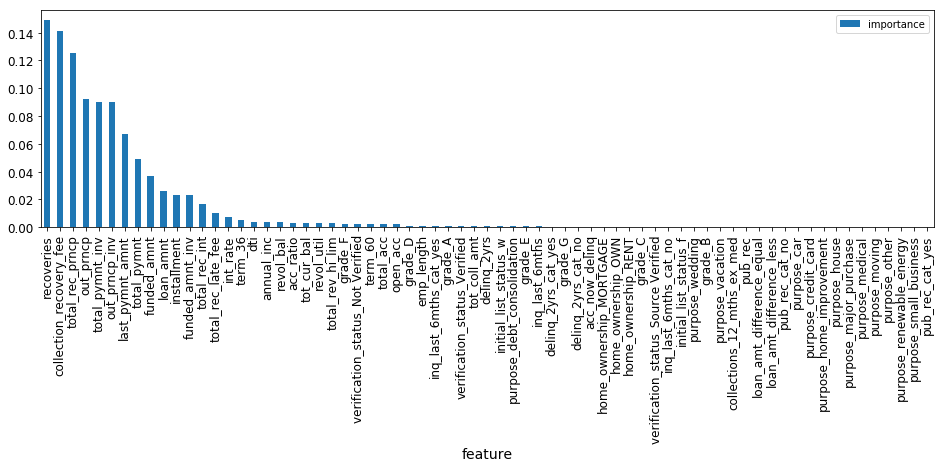

In [114]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier();

refclasscol = train_data_X.columns

# fit random forest classifier on the training set
rfc_model.fit(train_data_X, train_data_y);

# extract important features
score = np.round(rfc_model.feature_importances_, 3)
importances = pd.DataFrame({'feature':refclasscol, 'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# random forest classifier parameters used for feature importances
print(rfc_model)

# plot importances
importances.plot.bar();

We will be using features whose importnace calculated by random forest calssifier is more than 0. Based on the feature selection parameter, we should apply feature selection on train & test dataset

In [115]:
from sklearn.feature_selection import SelectFromModel

selection = SelectFromModel(rfc_model, threshold = 0.001, prefit=True)

select_train_x = selection.transform(train_data_X)
select_test_x = selection.transform(test_data_X)

print('Train dataset dimension before Feature Selection: {} rows, {} columns'.format(train_data_X.shape[0], train_data_X.shape[1]))
print('Train dataset dimension after Feature Selection: {} rows, {} columns'.format(select_train_x.shape[0], select_train_x.shape[1]))

Train dataset dimension before Feature Selection: 500662 rows, 69 columns
Train dataset dimension after Feature Selection: 500662 rows, 30 columns


In [116]:
def calc_sens_spec(conf_matrix):
    TP = conf_matrix[1][1]; TN = conf_matrix[0][0]; FP = conf_matrix[0][1]; FN = conf_matrix[1][0];
    sensitivity = TP / float(TP + FN); specificity = TN / float(TN + FP);
    return sensitivity, specificity

### Step 5.3 - Train Models & Evaluate through Cross-Validation
We will train 4 classification models i.e. Logistic Regression, KNN, Decision Tree Classifier and Random Forest Classifier. Once we build all the 4 models, we will identify the best performer through accuracy, CV score, sensitivity & specificity parameters.

In [117]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics

logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(5)

models = [knn_model, logreg_model, dt_model, rf_model]

for model in models:
    print('Cross-Validation of : {0}'.format(model.__class__))
    
    model.fit(select_train_x, train_data_y)
    pred_y = model.predict(select_train_x)
    pred_prob_y = model.predict_proba(select_train_x)[:,1]
    
    accuracy = metrics.accuracy_score(train_data_y, pred_y)
    confusion = metrics.confusion_matrix(train_data_y, pred_y)
    sensitivity, specificity = calc_sens_spec(confusion)
    
    roc_score = metrics.roc_auc_score(train_data_y, pred_prob_y)
    f1_score = metrics.f1_score(train_data_y, pred_y)
    
    scores = cross_val_score(model, select_train_x, train_data_y, cv=10)

    print("Train Accuracy: %.2f%%, CV Mean Score=%.2f%%, Sensitivity=%.2f%%, Specifivity=%.2f%%, ROC Score=%.2f%%, F1 Score=%.2f%%" % 
          (accuracy*100.0, scores.mean()*100.0, sensitivity*100.0, specificity*100.0, roc_score*100.0, f1_score*100.0))
    print('***************************************************************************************')

Cross-Validation of : <class 'sklearn.neighbors.classification.KNeighborsClassifier'>
Train Accuracy: 98.51%, CV Mean Score=98.09%, Sensitivity=77.70%, Specifivity=99.98%, ROC Score=99.76%, F1 Score=87.31%
***************************************************************************************
Cross-Validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
Train Accuracy: 99.69%, CV Mean Score=99.70%, Sensitivity=95.41%, Specifivity=99.99%, ROC Score=98.81%, F1 Score=97.60%
***************************************************************************************
Cross-Validation of : <class 'sklearn.tree.tree.DecisionTreeClassifier'>
Train Accuracy: 100.00%, CV Mean Score=98.08%, Sensitivity=100.00%, Specifivity=100.00%, ROC Score=100.00%, F1 Score=100.00%
***************************************************************************************
Cross-Validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Train Accuracy: 99.95%, CV Mean Score=99.50%, Sensit

We can see from above models that Decision Tree & Random Forest performs very well on training dataset along with corss validation technique. However, 100% accuracy means our model might be overfitted. If you observe Decision Tree model outperforms Random Forest with 100% in all parameters. So, let's use Decision Tree & Random Forest models on our test dataset and look into the accuracy including cross-validation scores.

## Step 6 - Model Testing
### Step 6.1 - Model Testing through Decision Tree

In [118]:
final_dt_model = DecisionTreeClassifier()
print('Loan Default Prediction using : {0}'.format(final_dt_model.__class__))
    
final_dt_model.fit(select_train_x, train_data_y)

dt_pred_train_y = final_dt_model.predict(select_train_x)
dt_pred_prob_train_y = final_dt_model.predict_proba(select_train_x)[:, 1]
dt_train_accuracy = metrics.accuracy_score(train_data_y, pred_train_y)

dt_scores = cross_val_score(final_dt_model, select_train_x, train_data_y, cv=10)

dt_pred_test_y = final_dt_model.predict(select_test_x)
dt_pred_prob_test_y = final_dt_model.predict_proba(select_test_x)[:, 1]
dt_test_accuracy = metrics.accuracy_score(test_data_y, pred_test_y)

dt_roc_score = metrics.roc_auc_score(test_data_y, dt_pred_prob_test_y)
dt_f1_score = metrics.f1_score(test_data_y, dt_pred_test_y)

dt_confusion = metrics.confusion_matrix(test_data_y, pred_test_y)
dt_sensitivity, dt_specificity = calc_sens_spec(dt_confusion)
    
print("Train Accuracy: %.2f%%, Train CV Mean Score=%.2f%%, Test Accuracy: %.2f%%, Test Sensitivity=%.2f%%, Test Specifivity=%.2f%%" % 
     (dt_train_accuracy*100.0, dt_scores.mean()*100.0, dt_test_accuracy*100.0, dt_sensitivity*100.0, dt_specificity*100.0))
print("ROC Score=%.2f%%, F1 Score=%.2f%%" % 
     (dt_roc_score*100.0, dt_f1_score*100.0))
print('*******************************************************************************************************')

Loan Default Prediction using : <class 'sklearn.tree.tree.DecisionTreeClassifier'>
Train Accuracy: 99.95%, Train CV Mean Score=98.03%, Test Accuracy: 37.42%, Test Sensitivity=99.54%, Test Specifivity=37.37%
ROC Score=66.14%, F1 Score=0.27%
*******************************************************************************************************


As you can notice above all the metrics are performing good on test dataset except specificity which is way below. This means Customer who should get loans are also getting into Loan Defaulter category. Let's try Random Forest model and check its performance on test dataset.

### Step 6.2 - Model Testing through Random Forest

In [119]:
final_rf_model = RandomForestClassifier()
print('Loan Default Prediction using : {0}'.format(final_rf_model.__class__))
    
final_rf_model.fit(select_train_x, train_data_y)

rf_pred_train_y = final_rf_model.predict(select_train_x)    
rf_pred_prob_train_y = final_rf_model.predict_proba(select_train_x)[:, 1]
rf_train_accuracy = metrics.accuracy_score(train_data_y, pred_train_y)

rf_scores = cross_val_score(final_rf_model, select_train_x, train_data_y, cv=10)

rf_pred_test_y = final_rf_model.predict(select_test_x)
rf_pred_prob_test_y = final_rf_model.predict_proba(select_test_x)[:, 1]
rf_test_accuracy = metrics.accuracy_score(test_data_y, pred_test_y)

rf_roc_score = metrics.roc_auc_score(test_data_y, rf_pred_prob_test_y)
rf_f1_score = metrics.f1_score(test_data_y, rf_pred_test_y)

rf_confusion = metrics.confusion_matrix(test_data_y, pred_test_y)
rf_sensitivity, rf_specificity = calc_sens_spec(rf_confusion)

print("Train Accuracy: %.2f%%, Train CV Mean Score=%.2f%%, Test Accuracy: %.2f%%, Test Sensitivity=%.2f%%, Test Specifivity=%.2f%%" % 
     (rf_train_accuracy*100.0, rf_scores.mean()*100.0, rf_test_accuracy*100.0, rf_sensitivity*100.0, rf_specificity*100.0))
print("ROC Score=%.2f%%, F1 Score=%.2f%%" % 
     (rf_roc_score*100.0, rf_f1_score*100.0))
print('*******************************************************************************************************')

Loan Default Prediction using : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Train Accuracy: 99.95%, Train CV Mean Score=99.48%, Test Accuracy: 37.42%, Test Sensitivity=99.54%, Test Specifivity=37.37%
ROC Score=88.78%, F1 Score=0.31%
*******************************************************************************************************


### Step 6.3 - Check Predicted Probabilities

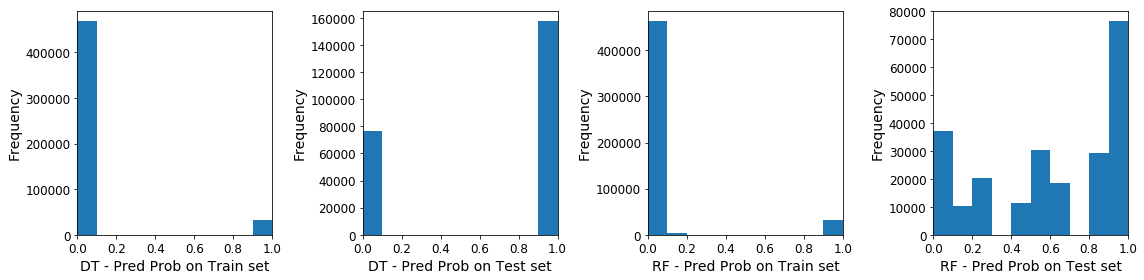

In [123]:
# Plot predicted probabilities by decision tree model & random forest to observe how class probabilities are spread
fig = plt.figure(figsize=(16,4))

# Histogram Plot for Predicted Probabilities of Loan Default on Train Dataset using Decision Tree model
plt.subplot(1,4,1)
plt.hist(dt_pred_prob_train_y)
plt.xlim(0, 1)
plt.xlabel('DT - Pred Prob on Train set')
plt.ylabel('Frequency')

# Histogram Plot for Predicted Probabilities of Loan Default on Test Dataset using Decision Tree model
plt.subplot(1,4,2)
plt.hist(dt_pred_prob_test_y)
plt.xlim(0, 1)
plt.xlabel('DT - Pred Prob on Test set')
plt.ylabel('Frequency')

# Histogram Plot for Predicted Probabilities of Loan Default on Train Dataset using Random Forest model
plt.subplot(1,4,3)
plt.hist(rf_pred_prob_train_y)
plt.xlim(0, 1)
plt.xlabel('RF - Pred Prob on Train set')
plt.ylabel('Frequency')

# Histogram Plot for Predicted Probabilities of Loan Default on Test Dataset using Random Forest model
plt.subplot(1,4,4)
plt.hist(rf_pred_prob_test_y)
plt.xlim(0, 1)
plt.xlabel('RF - Pred Prob on Test set')
plt.ylabel('Frequency')

fig.tight_layout();

### Step 6.4 - Identify Cutoff score for Decision Tree Model

In [124]:
# Check calssification parameters performance based on cutoff values on class probabilities predicted through Decision Tree model
cutoff_range = [0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95]

for cut_off in cutoff_range:
    new_pred_class = np.where(dt_pred_prob_train_y > cut_off, 1, 0)

    new_dt_confusion = metrics.confusion_matrix(train_data_y, new_pred_class)
    new_dt_sensitivity, new_dt_specificity = calc_sens_spec(new_dt_confusion)
    new_dt_test_accuracy = metrics.accuracy_score(train_data_y, new_pred_class)

    print("Train Dataset - Cutoff : %.2f, Train Accuracy: %.2f%%, Train Sensitivity=%.2f%%, Train Specifivity=%.2f%%" % 
         (cut_off, new_dt_test_accuracy*100.0, new_dt_sensitivity*100.0, new_dt_specificity*100.0))

print('\n')

for cut_off in cutoff_range:
    new_pred_class = np.where(dt_pred_prob_test_y > cut_off, 1, 0)

    new_dt_confusion = metrics.confusion_matrix(test_data_y, new_pred_class)
    new_dt_sensitivity, new_dt_specificity = calc_sens_spec(new_dt_confusion)
    new_dt_test_accuracy = metrics.accuracy_score(test_data_y, new_pred_class)

    print("Test Dataset - Cutoff : %.2f, Test Accuracy: %.2f%%, Test Sensitivity=%.2f%%, Test Specifivity=%.2f%%" % 
         (cut_off, new_dt_test_accuracy*100.0, new_dt_sensitivity*100.0, new_dt_specificity*100.0))

Train Dataset - Cutoff : 0.50, Train Accuracy: 100.00%, Train Sensitivity=100.00%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.60, Train Accuracy: 100.00%, Train Sensitivity=100.00%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.70, Train Accuracy: 100.00%, Train Sensitivity=100.00%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.80, Train Accuracy: 100.00%, Train Sensitivity=100.00%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.85, Train Accuracy: 100.00%, Train Sensitivity=100.00%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.90, Train Accuracy: 100.00%, Train Sensitivity=100.00%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.95, Train Accuracy: 100.00%, Train Sensitivity=100.00%, Train Specifivity=100.00%


Test Dataset - Cutoff : 0.50, Test Accuracy: 32.81%, Test Sensitivity=99.54%, Test Specifivity=32.75%
Test Dataset - Cutoff : 0.60, Test Accuracy: 32.81%, Test Sensitivity=99.54%, Test Specifivity=32.75%
Test Dataset - Cutoff : 0.70, T

### Step 6.4 - Identify Cutoff score for Random Forest Model

In [125]:
# Check calssification parameters performance based on cutoff values on class probabilities predicted through Random Forest model
cutoff_range = [0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95]

for cut_off in cutoff_range:
    new_pred_class = np.where(rf_pred_prob_train_y > cut_off, 1, 0)

    new_rf_confusion = metrics.confusion_matrix(train_data_y, new_pred_class)
    new_rf_sensitivity, new_rf_specificity = calc_sens_spec(new_rf_confusion)
    new_rf_test_accuracy = metrics.accuracy_score(train_data_y, new_pred_class)

    print("Train Dataset - Cutoff : %.2f, Train Accuracy: %.2f%%, Train Sensitivity=%.2f%%, Train Specifivity=%.2f%%" % 
         (cut_off, new_rf_test_accuracy*100.0, new_rf_sensitivity*100.0, new_rf_specificity*100.0))

print('\n')

for cut_off in cutoff_range:
    new_pred_class = np.where(rf_pred_prob_test_y > cut_off, 1, 0)

    new_rf_confusion = metrics.confusion_matrix(test_data_y, new_pred_class)
    new_rf_sensitivity, new_rf_specificity = calc_sens_spec(new_rf_confusion)
    new_rf_test_accuracy = metrics.accuracy_score(test_data_y, new_pred_class)

    print("Test Dataset - Cutoff : %.2f, Test Accuracy: %.2f%%, Test Sensitivity=%.2f%%, Test Specifivity=%.2f%%" % 
         (cut_off, new_rf_test_accuracy*100.0, new_rf_sensitivity*100.0, new_rf_specificity*100.0))

Train Dataset - Cutoff : 0.50, Train Accuracy: 99.94%, Train Sensitivity=99.17%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.60, Train Accuracy: 99.89%, Train Sensitivity=98.32%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.70, Train Accuracy: 99.83%, Train Sensitivity=97.43%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.80, Train Accuracy: 99.76%, Train Sensitivity=96.40%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.85, Train Accuracy: 99.76%, Train Sensitivity=96.40%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.90, Train Accuracy: 99.59%, Train Sensitivity=93.86%, Train Specifivity=100.00%
Train Dataset - Cutoff : 0.95, Train Accuracy: 99.59%, Train Sensitivity=93.86%, Train Specifivity=100.00%


Test Dataset - Cutoff : 0.50, Test Accuracy: 40.00%, Test Sensitivity=99.54%, Test Specifivity=39.95%
Test Dataset - Cutoff : 0.60, Test Accuracy: 46.97%, Test Sensitivity=99.08%, Test Specifivity=46.92%
Test Dataset - Cutoff : 0.70, Test Accuracy: 

## So, we can choose Random Forest model with cutoff score = 90%